<a href="https://colab.research.google.com/github/migot01/PyTorch-fastai/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [16]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [17]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [18]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

## **Explore the data**

In [20]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_36.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_167.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_95.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_166.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_48.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [22]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,chihuahua,pomeranian,chihuahua,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scottish_terrier,Abyssinian,Bombay,pug,japanese_chin
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

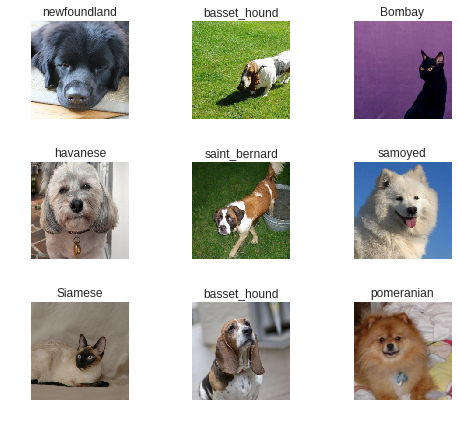

In [23]:
data.show_batch(rows=3, figsize=(7,6))

In [24]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## **Training the model**

In [26]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:04, 18825956.41it/s]


In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.411221,0.321439,0.092016,02:05
1,0.563441,0.245366,0.082544,02:05
2,0.347517,0.211094,0.067659,02:06
3,0.254981,0.201384,0.068336,02:06


In [0]:
learn.save('stage-1')

## **Analysing the results**

In [0]:
 interp = ClassificationInterpretation.from_learner(learn)

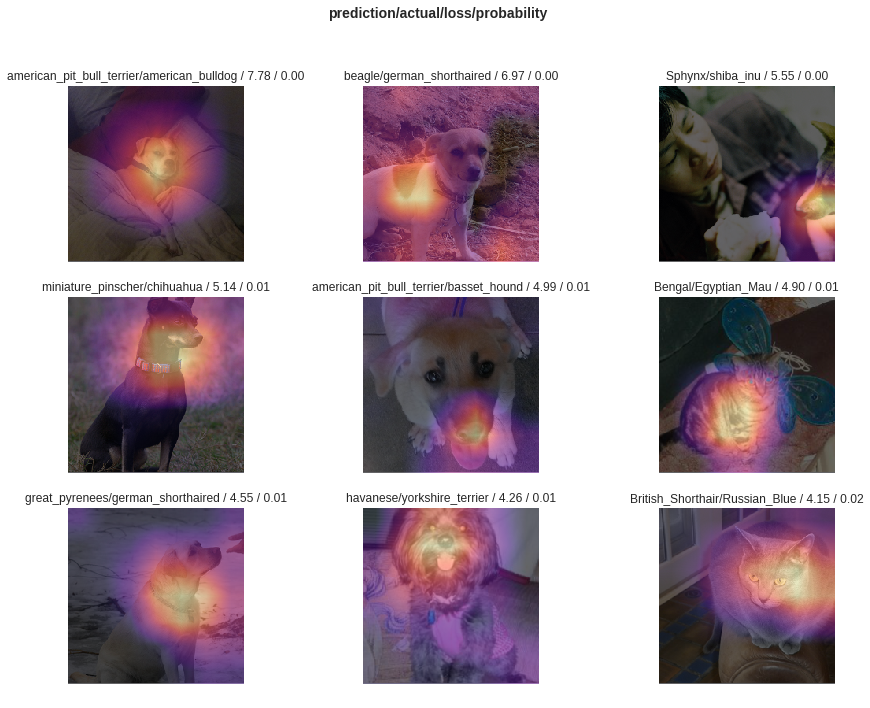

In [31]:
interp.plot_top_losses(9, figsize=(15, 11))

In [0]:
doc(interp.plot_top_losses)

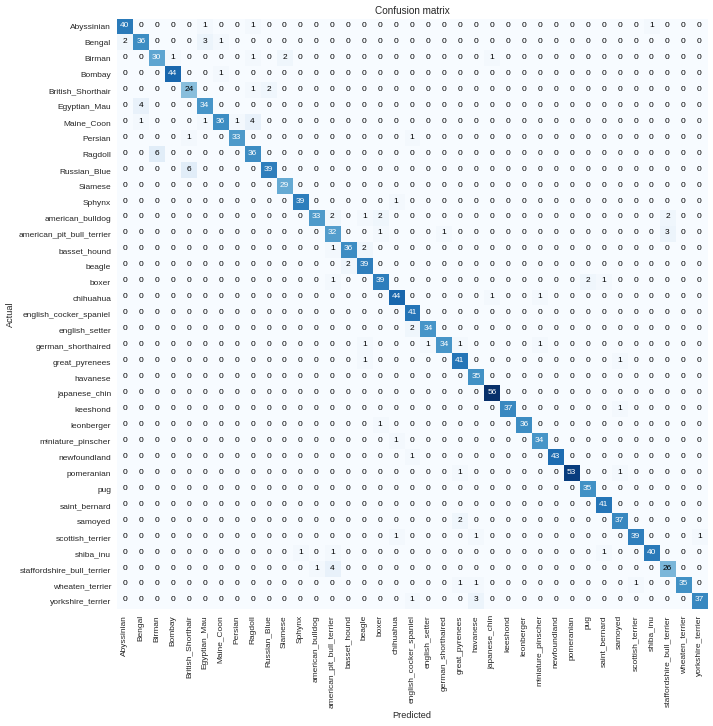

In [33]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [34]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('Russian_Blue', 'British_Shorthair', 6),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'pug', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('samoyed', 'great_pyrenees', 2)]

## **unfreezing, fin-tuning, and learning rates**

In [0]:
# since the model is working as expected ,I will unfreeze the model and train some more
learn.unfreeze()

In [36]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.525649,0.298209,0.103518,02:09


In [37]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,chihuahua,pomeranian,chihuahua,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scottish_terrier,Abyssinian,Bombay,pug,japanese_chin
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stri

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


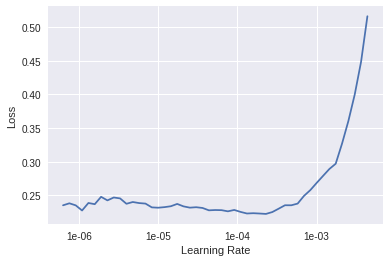

In [39]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.226555,0.199078,0.064276,02:08
1,0.207724,0.194389,0.065629,02:08
